
**Safara Risda Agastya - A11.2022.14670**

In [29]:
import pandas as pd

In [30]:
dataset = pd.read_csv('data_rumah.csv')

**Data Understanding**
 
Memanggil library yang dibutuhkan

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [32]:
# Membuka file data dari komputer (local)

df = pd.read_csv('data_rumah.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [33]:
dataset['date'] = pd.to_datetime(dataset['date'])

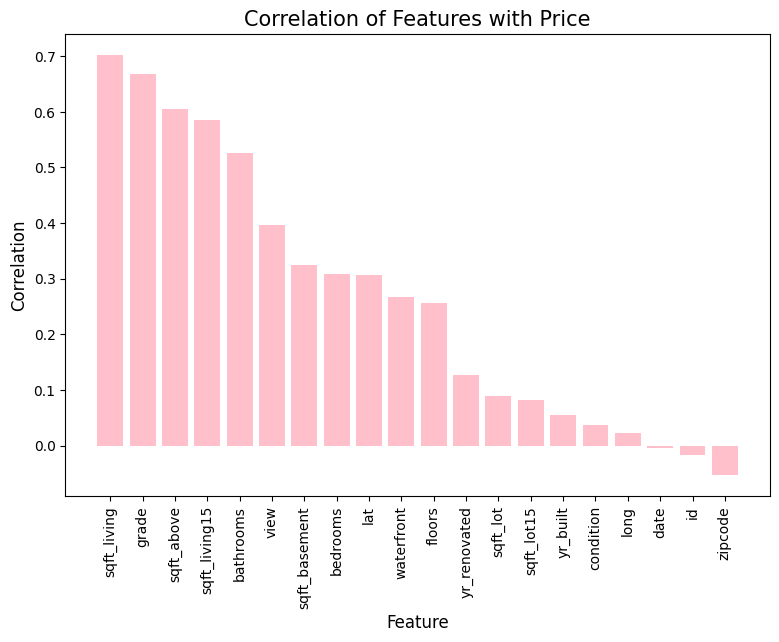

In [34]:
# Melihat variabel yang paling berpengaruh terhadap harga
cor = dataset.corr()['price'].sort_values(ascending=False).drop(['price'])
f=plt.figure(figsize=(20,6))

f.add_subplot(1,2,1)
plt.bar(x=list(cor.index), height=list(cor.values), color='pink')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)


plt.show()

Dari grafik diatas, kita dapat mengidentifikasi variabel-variabel yang memiliki korelasi yang signifikan terhadap harga. Variabel yang dipilih berdasarkan korelasi tinggi adalah 'sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', dan 'floors'. Variabel independen ini akan digunakan untuk memprediksi variabel dependen, yaitu 'price'.

Dengan demikian, kita akan membuat sebuah DataFrame yang mengandung data dari variabel-variabel independen dan dependen yang relevan untuk analisis lebih lanjut.

In [35]:
# Memuat data dari google drive
# dataFrame = pd.read_csv('/content/drive/My Drive/latian prediksi harga rumah/kc_house_data.csv', usecols=['floors','bedrooms', 'bathrooms', 'sqft_living', 'grade','yr_built','price'])

# Memuat data dari komputer (local)
dataFrame = pd.read_csv('data_rumah.csv', usecols=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms','floors','price', 'yr_built'])
dataFrame

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
0,221900.0,3,1.00,1180,1.0,7,1180,1955,1340
1,538000.0,3,2.25,2570,2.0,7,2170,1951,1690
2,180000.0,2,1.00,770,1.0,6,770,1933,2720
3,604000.0,4,3.00,1960,1.0,7,1050,1965,1360
4,510000.0,3,2.00,1680,1.0,8,1680,1987,1800
...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,8,1530,2009,1530
21609,400000.0,4,2.50,2310,2.0,8,2310,2014,1830
21610,402101.0,2,0.75,1020,2.0,7,1020,2009,1020
21611,400000.0,3,2.50,1600,2.0,8,1600,2004,1410


Penjelasan dari kolom dataset diatas:

- price : harga rumah ($)
- bedrooms : jumlah kamar tidur
- bathrooms : jumlah kamar mandi
- sqft_living : luas ruangan dalam satuan sqft (square feet)
- floors : jumlah lantai
- grade : klasifikasi dari kelas rumah
- sqft_above : luas ruangan di atas tanah
- sqft_living15 : rata-rata luas tanah dari 15 tetangga terdekat

In [36]:
#melihat 15 data terbatas
dataFrame.head(15)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
0,221900.0,3,1.00,1180,1.0,7,1180,1955,1340
1,538000.0,3,2.25,2570,2.0,7,2170,1951,1690
2,180000.0,2,1.00,770,1.0,6,770,1933,2720
3,604000.0,4,3.00,1960,1.0,7,1050,1965,1360
4,510000.0,3,2.00,1680,1.0,8,1680,1987,1800
5,1225000.0,4,4.50,5420,1.0,11,3890,2001,4760
6,257500.0,3,2.25,1715,2.0,7,1715,1995,2238
7,291850.0,3,1.50,1060,1.0,7,1060,1963,1650
8,229500.0,3,1.00,1780,1.0,7,1050,1960,1780
9,323000.0,3,2.50,1890,2.0,7,1890,2003,2390


In [11]:
#melihat 15 data terbawah
dataFrame.tail(15)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
21598,541800.0,4,2.50,3118,2.0,9,3118,2014,2673
21599,810000.0,4,3.00,3990,2.0,9,3990,2003,3370
21600,1537000.0,5,3.75,4470,2.0,11,4470,2008,2780
21601,467000.0,3,2.50,1425,3.0,8,1425,2008,1285
21602,224000.0,3,1.75,1500,1.0,6,1500,2014,1320
21603,507250.0,3,2.50,2270,2.0,8,2270,2003,2270
21604,429000.0,3,2.00,1490,3.0,8,1490,2014,1400
21605,610685.0,4,2.50,2520,2.0,9,2520,2014,2520
21606,1007500.0,4,3.50,3510,2.0,9,2600,2009,2050
21607,475000.0,3,2.50,1310,2.0,8,1180,2008,1330


In [12]:
#melihat jumlah baris dan kolom
dataFrame.shape

(21613, 9)

In [13]:
#melihat nama kolom, jumlah data, dan tipe data
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   grade          21613 non-null  int64  
 6   sqft_above     21613 non-null  int64  
 7   yr_built       21613 non-null  int64  
 8   sqft_living15  21613 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 1.5 MB


Dari data diatas dapat dilihat bahwa kolom 'bathrooms' dan 'floors' memiliki tipe data float, kita perlu mengubahnya menjadi integer karena nilai dari kolom 'bathrooms' dan 'floors' harus bilangan bulat.

In [14]:
#melihat nilai dengan jumlah data terbanyak pada olom 'bedrooms'
dataFrame['bedrooms'].value_counts().sort_index(ascending=True)

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

Dari data diatas menunjukkan ada 'bedrooms' dengan nilai 33, nilai tersebut dirasa kurang masuk akal untuk sebuah rumah, jadi kita akan menghapusnya di tahap selanjutnya.

**Data Preparation**

Data preparation adalah proses pengumpulan, penggabungan, penataan, dan pengorganisasian data sehingga dapat digunakan dalam analitik, dan visualisasi data.

In [15]:
#melihat data yang kosong
dataFrame.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
grade            0
sqft_above       0
yr_built         0
sqft_living15    0
dtype: int64

Dari hasil diatas tidak ada data yang kosong, sehingga tidak perlu melakukan manipulasi data kosong.

Mengubah tipe data pada kolom 'bathrooms' (dari float ke integer) karena data 'bathroom' harus bilangan bulat.

In [16]:
#mengubah tipe data kolom 'bathrooms' menjadi integer(int)
dataFrame['bathrooms'] = dataFrame['bathrooms'].astype(int)
dataFrame.dtypes

price            float64
bedrooms           int64
bathrooms          int32
sqft_living        int64
floors           float64
grade              int64
sqft_above         int64
yr_built           int64
sqft_living15      int64
dtype: object

Mengubah tipe data pada kolom 'floors' (dari float ke integer) karena data 'floors' harus bilangan bulat.

In [17]:
#mengubah tipe data kolom 'floors' menjadi integer(int)
dataFrame['floors'] = dataFrame['floors'].astype(int)
dataFrame.dtypes

price            float64
bedrooms           int64
bathrooms          int32
sqft_living        int64
floors             int32
grade              int64
sqft_above         int64
yr_built           int64
sqft_living15      int64
dtype: object

In [18]:
#menghapus data dengan 'bedrooms' dengan nilai 33
dataFrame = dataFrame[dataFrame['bedrooms'] != 33]

In [19]:
dataFrame['bedrooms'].value_counts().sort_index(ascending=True)

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [20]:
#mengecek apakah kolom 'bedrooms' dengan nilai 33 sudah dihilangkan
dataFrame[dataFrame['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15


Dari hasil diatas menunjukkan bahwa sudah tidak ada nilai 33 pada kolom 'bedrooms'.

In [21]:
# Melihat rangkuman statistik seperti rata-rata, median, dll pada kolom
dataFrame.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
count,2.161200e+04,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000,21612.000000
mean,5.400835e+05,3.369471,1.749769,2079.921016,1.446234,7.656904,1788.425319,1971.006247,1986.582871
std,3.671351e+05,0.907982,0.734872,918.456818,0.551898,1.175477,828.094487,29.373636,685.392610
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,290.000000,1900.000000,399.000000
25%,3.218375e+05,3.000000,1.000000,1426.500000,1.000000,7.000000,1190.000000,1951.000000,1490.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,1.000000,7.000000,1560.000000,1975.000000,1840.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,2.000000,8.000000,2210.000000,1997.000000,2360.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,3.000000,13.000000,9410.000000,2015.000000,6210.000000


**EDA(Exploratory Data Analysis)**

Exploratory Data Analysis adalah proses untuk melihat pola-pola tertentu dalam data

In [23]:
dataFrame.head()

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
0,221900.0,3,1,1180,1,7,1180,1955,1340
1,538000.0,3,2,2570,2,7,2170,1951,1690
2,180000.0,2,1,770,1,6,770,1933,2720
3,604000.0,4,3,1960,1,7,1050,1965,1360
4,510000.0,3,2,1680,1,8,1680,1987,1800


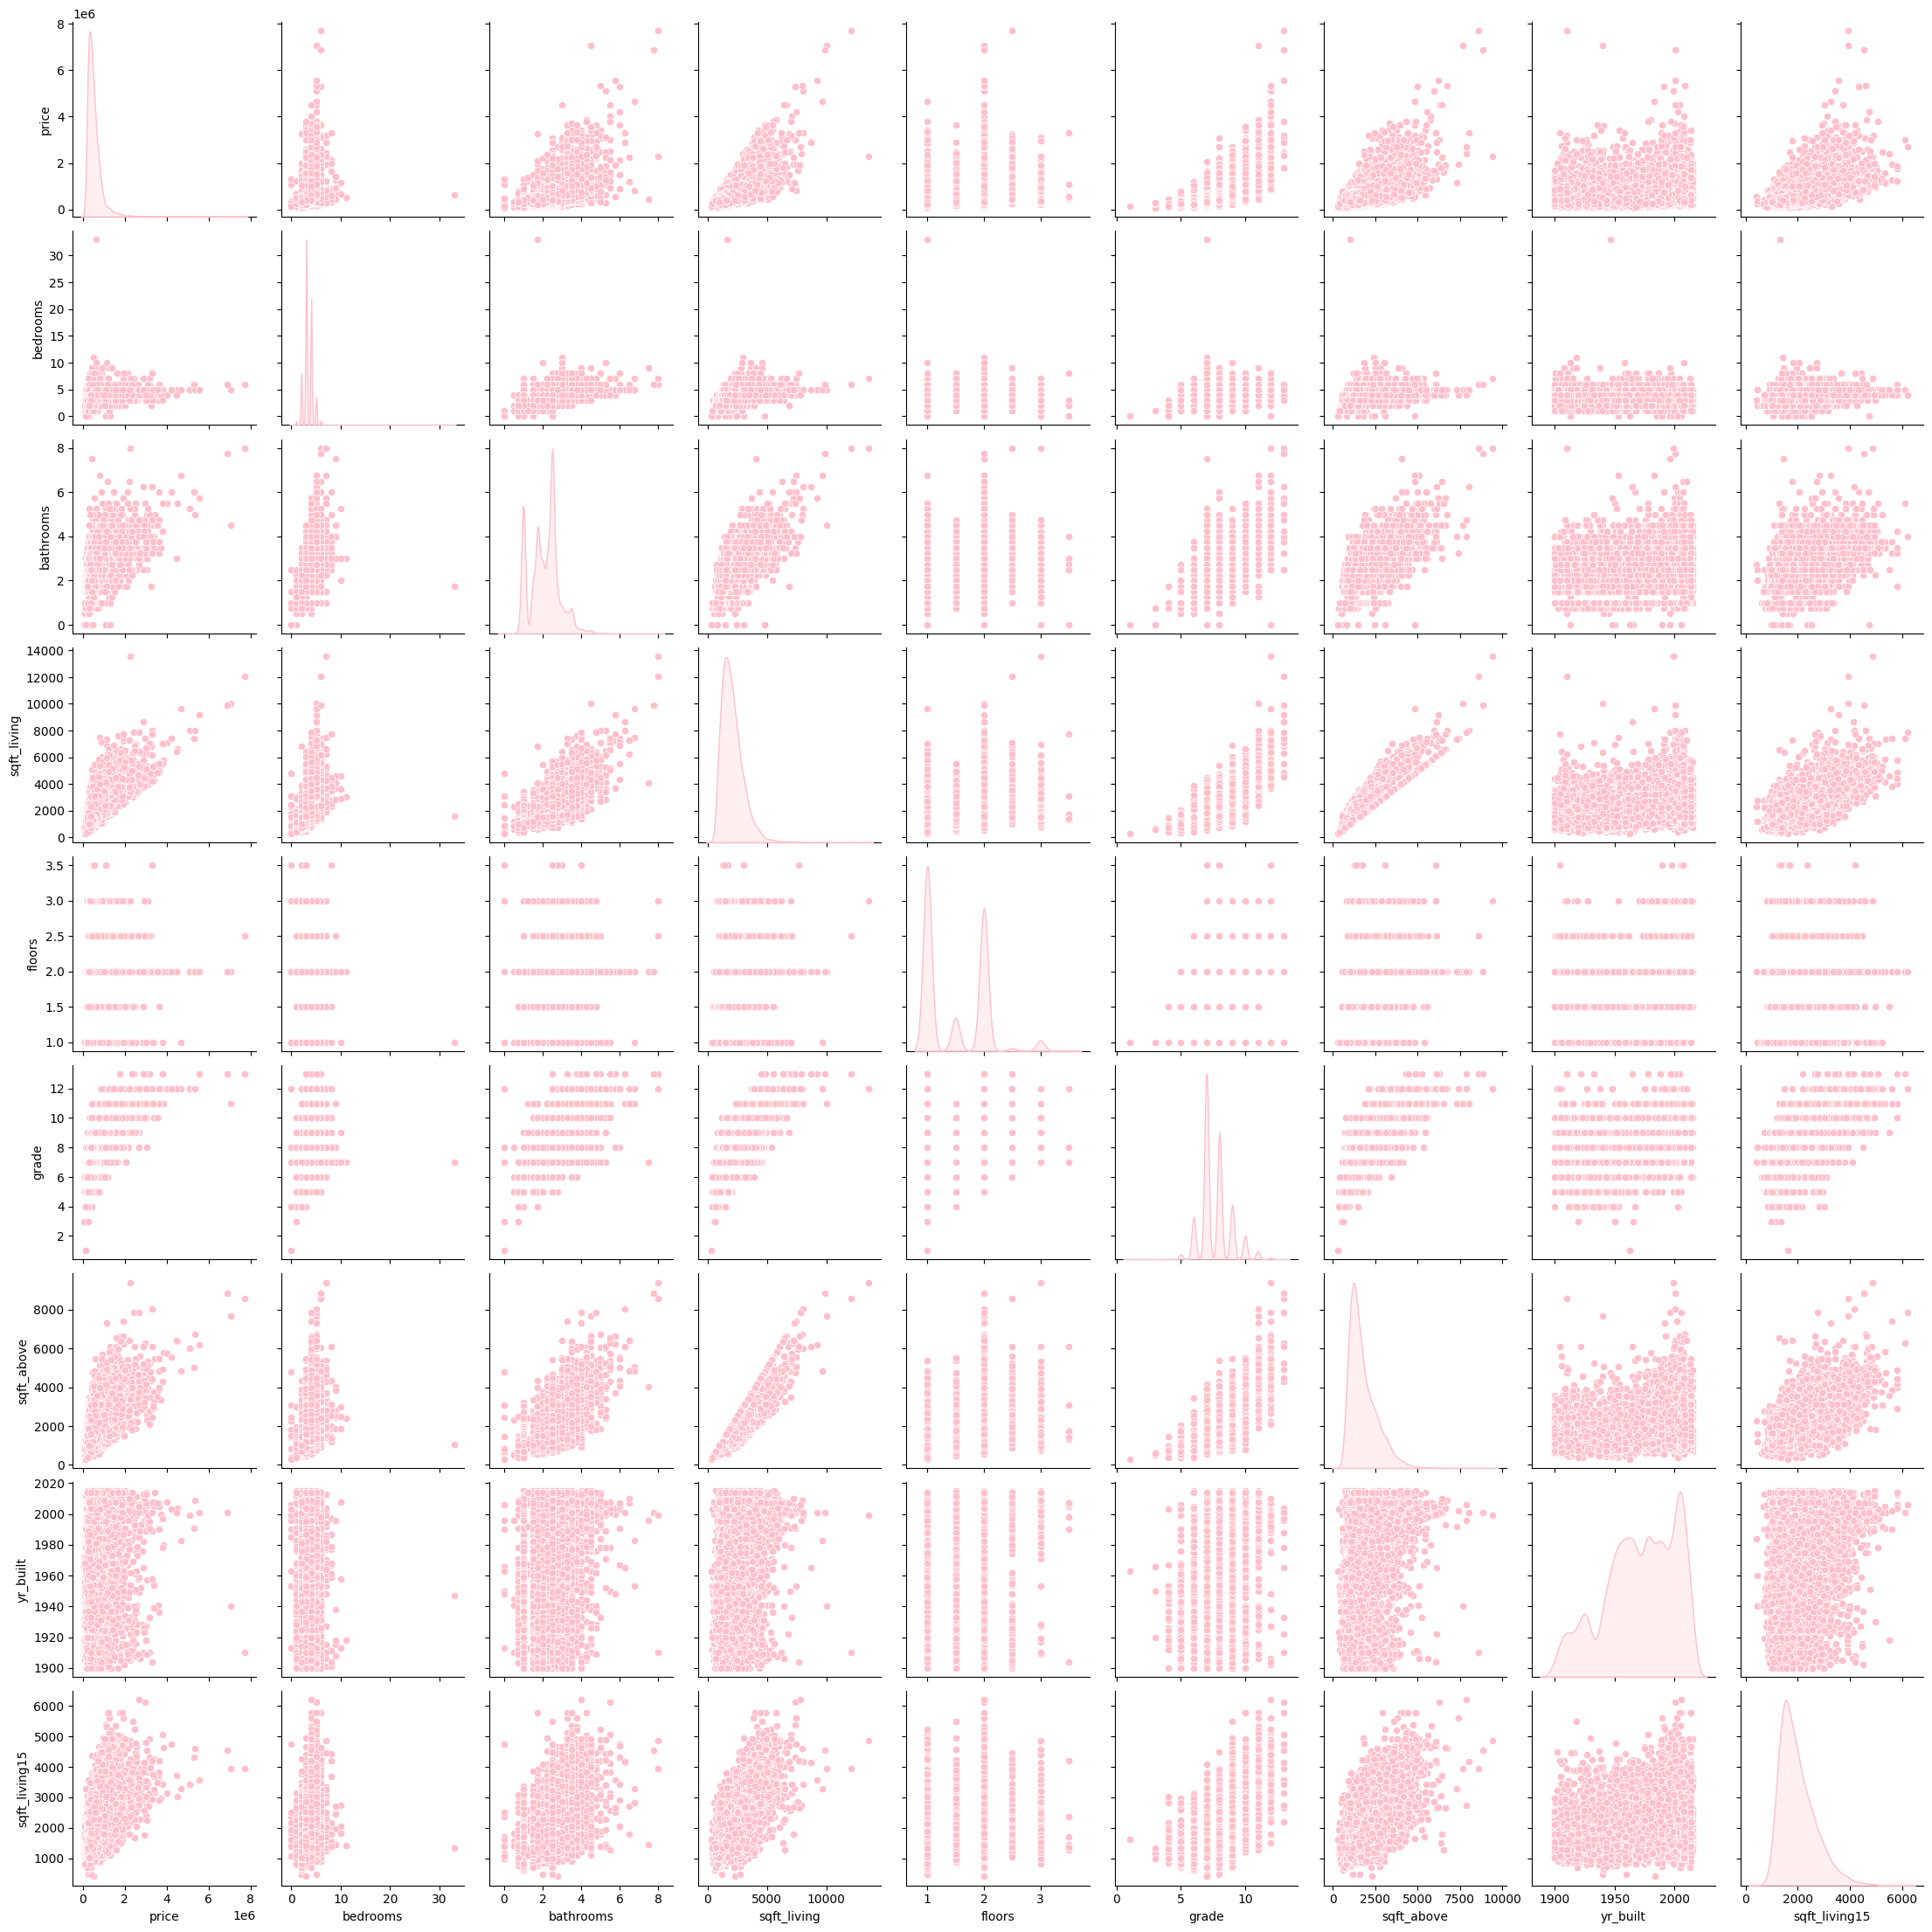

In [42]:
# membuat pairplot untuk melihat hubungan antar variabel
sns.pairplot(dataFrame, diag_kind='kde', plot_kws={'color':'pink'}, diag_kws={'color':'pink'})

**Melakukan Univariate Analysis**

Univariate Analysis berfungsi untuk menganalisa tiap variabel tanpa melihat hubungan dengan variabel lain.

Text(0.5, 1.0, 'Distribution of Bedrooms')

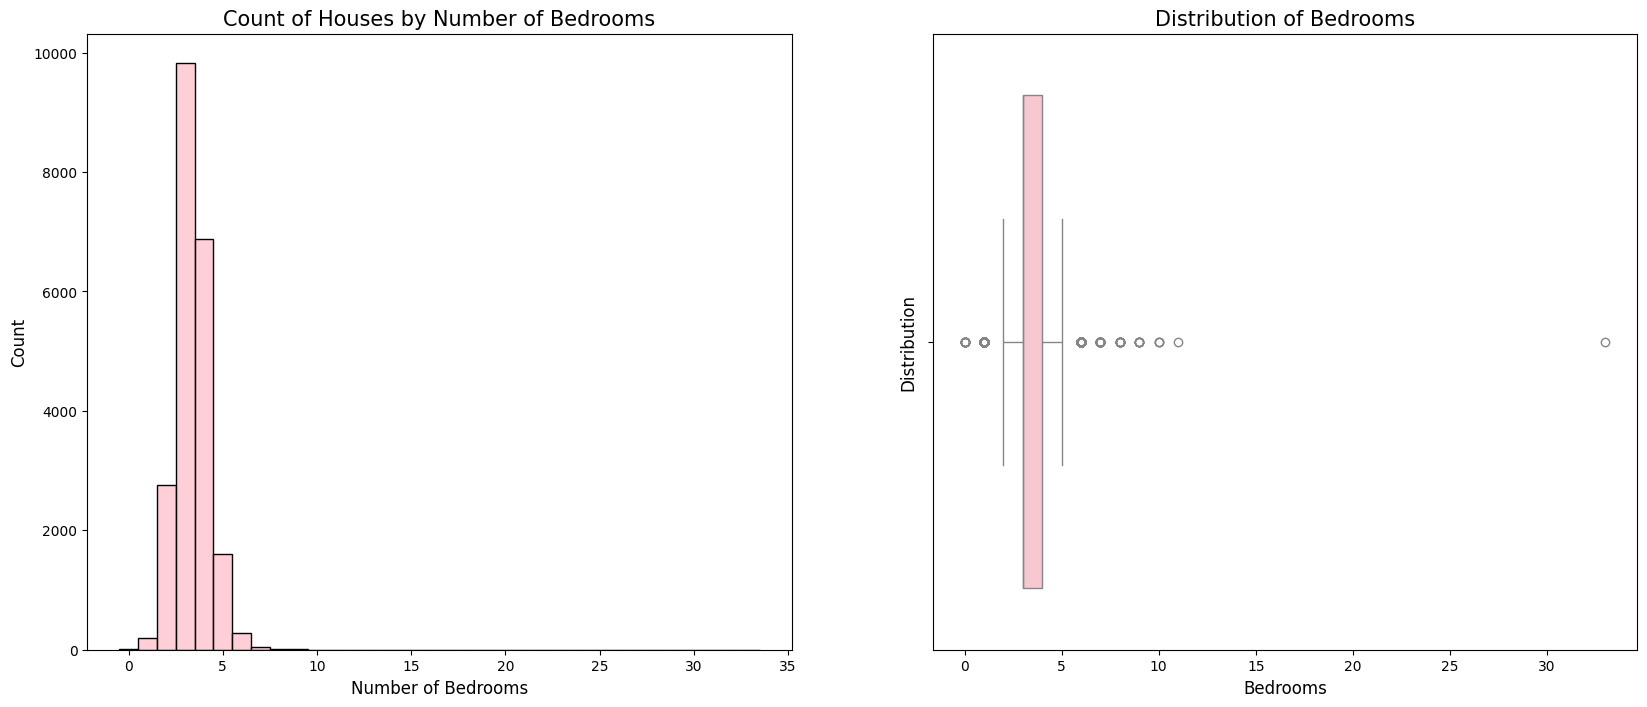

In [53]:
# univariate analysis variabel 'bedrooms'
plt.figure(figsize=(20, 8))

# Left subplot: Count plot for 'bedrooms'
plt.subplot(1, 2, 1)
sns.histplot(data=dataFrame, x='bedrooms', discrete=True, kde=False, color='pink')
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Houses by Number of Bedrooms', fontsize=15)

# Right subplot: Box plot for 'bedrooms'
plt.subplot(1, 2, 2)
sns.boxplot(data=dataFrame, x='bedrooms', color='pink')
plt.xlabel('Bedrooms', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.title('Distribution of Bedrooms', fontsize=15)

**informasi:**

- Kebanyakan jumlah bedrooms dalam rumah adalah 3 dan 4
- Banyak memiliki outliers dilihat dari data diluar garis minimum dan maksimum

Text(0.5, 1.0, 'Distribution of Bathrooms')

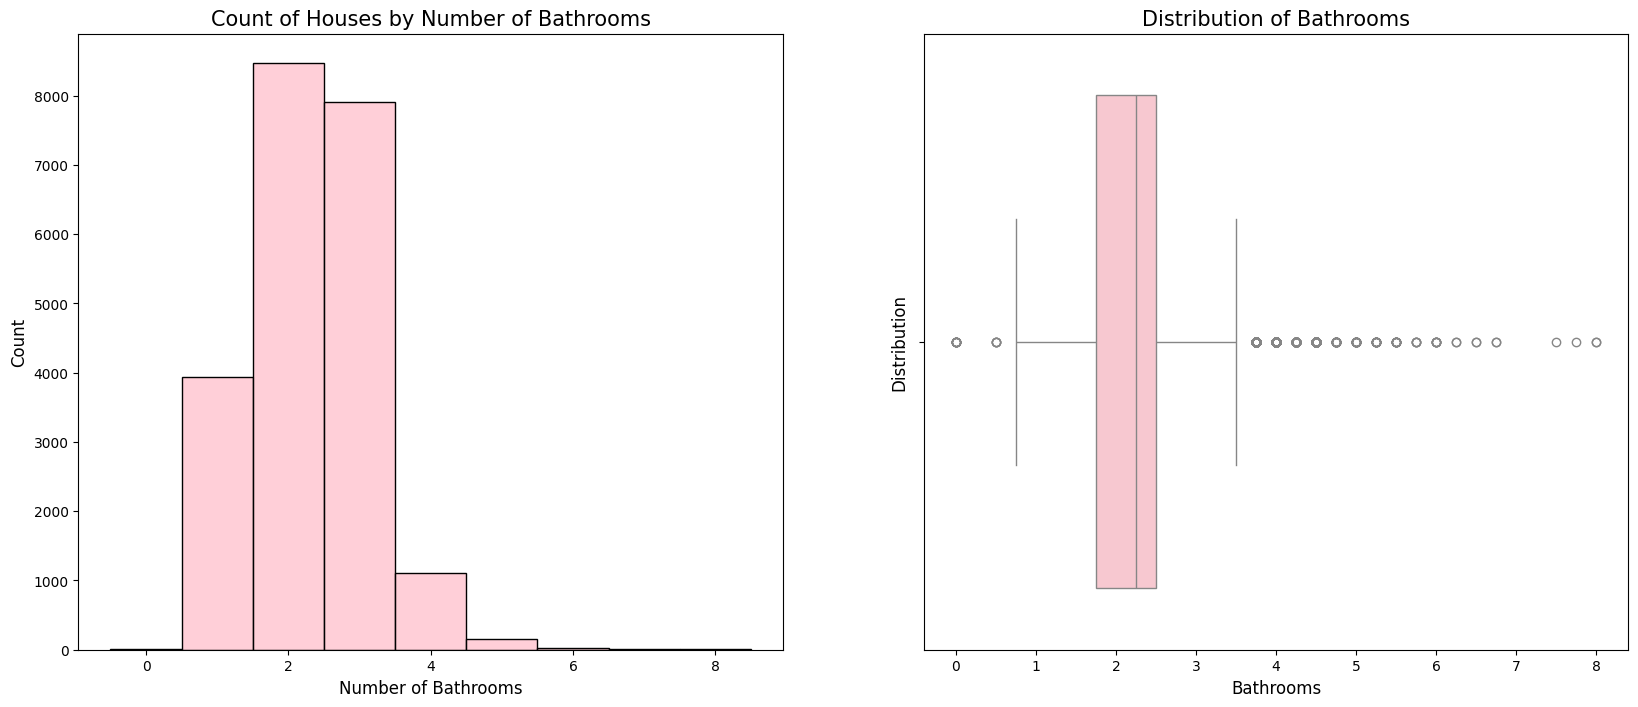

In [56]:
# univariate analysis variabel 'bathrooms'
plt.figure(figsize=(20, 8))

# Left subplot: Count plot for 'bathrooms'
plt.subplot(1, 2, 1)
sns.histplot(data=dataFrame, x='bathrooms', discrete=True, kde=False, color='pink')
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Houses by Number of Bathrooms', fontsize=15)

# Right subplot: Box plot for 'bathrooms'
plt.subplot(1, 2, 2)
sns.boxplot(data=dataFrame, x='bathrooms', color='pink')
plt.xlabel('Bathrooms', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.title('Distribution of Bathrooms', fontsize=15)

In [57]:
#melihat nilai tertinggi pada kolom 'bathrooms'
dataFrame['bathrooms'].value_counts().sort_index(ascending=True)

bathrooms
0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: count, dtype: int64

**Informasi:**

- Kebanyakan jumlah bathrooms dalam rumah adalah 1 dan 2
- Ada beberapa outliers dilihat dari data diluar garis maksimum

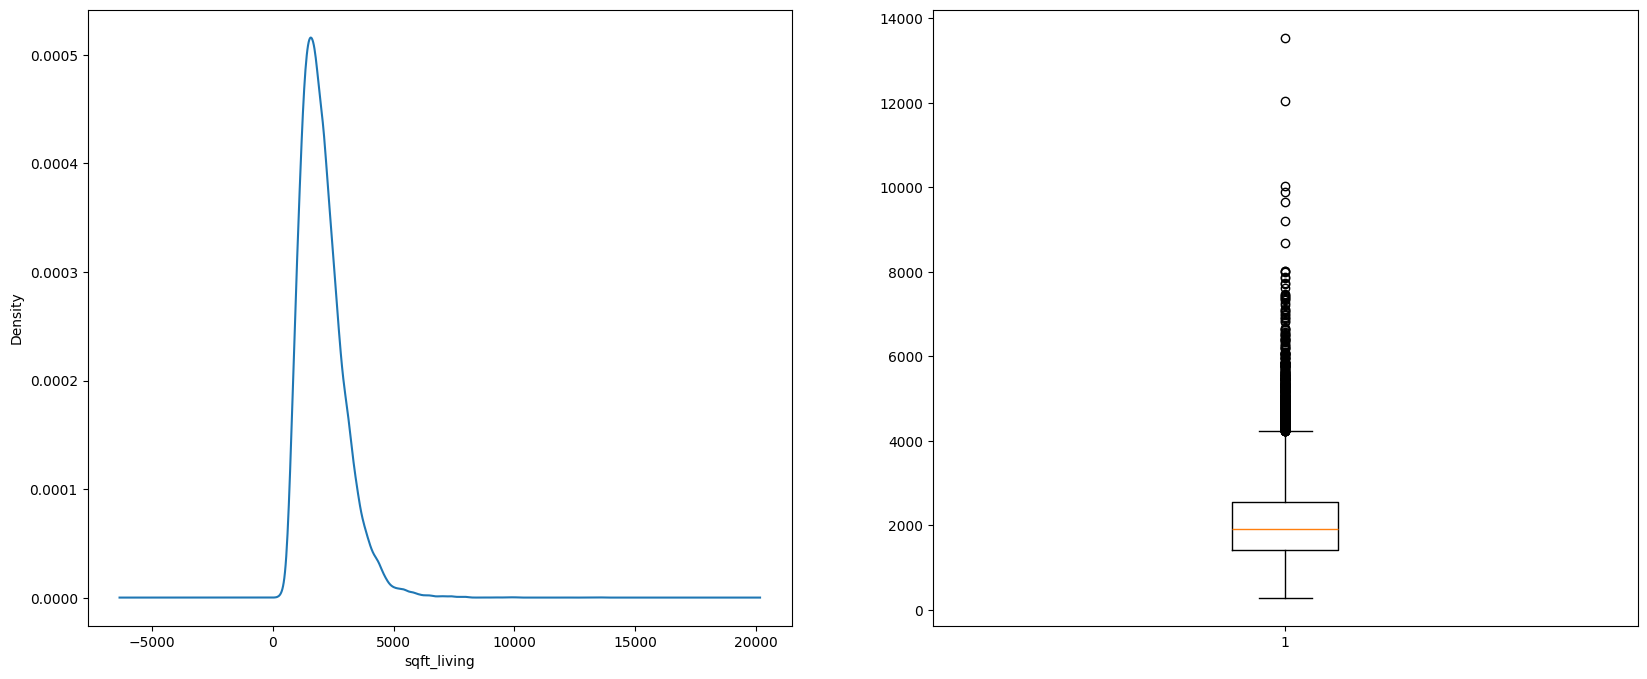

In [59]:
#univariate analysis variabel 'sqft_living'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
dataFrame['sqft_living'].plot(kind='kde')
plt.xlabel('sqft_living')

f.add_subplot(1,2,2)
#membuat boxplot untuk variabel 'sqft_living'
plt.boxplot(dataFrame['sqft_living'])
plt.show()

**Informasi:**

- Density(kepadatan) dari luas rumah(sqft_living) ada di angka 2000an
- Dilihat dari boxplot, ada banyak outliers di atas garis maksimum

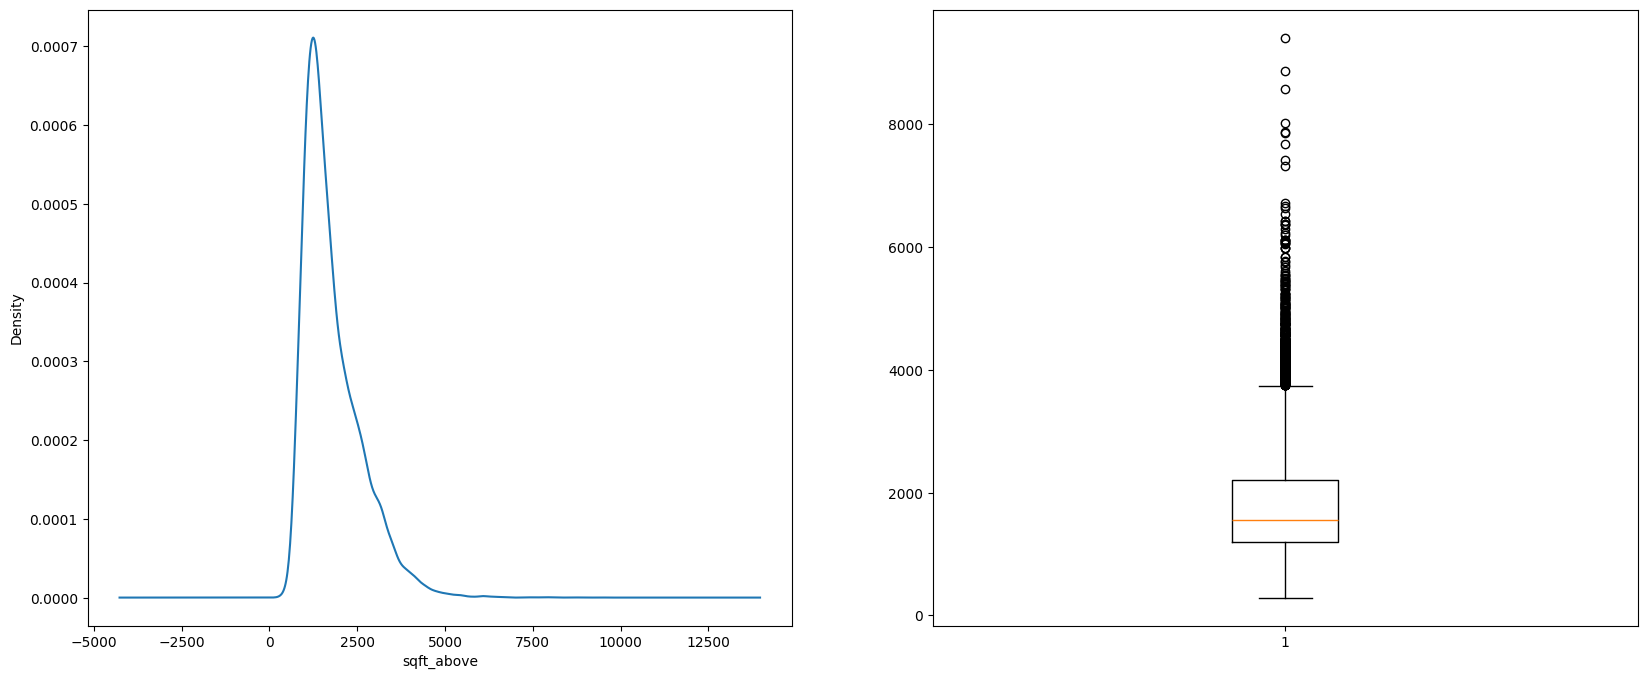

In [60]:
#univariate analysis variabel 'sqft_living'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
dataFrame['sqft_above'].plot(kind='kde')
plt.xlabel('sqft_above')

f.add_subplot(1,2,2)
#membuat boxplot untuk variabel 'sqft_above'
plt.boxplot(dataFrame['sqft_above'])
plt.show()

**Informasi:**

- Density(kepadatan) dari luas rumah(sqft_above) ada di angka 1500an
- Dilihat dari boxplot, ada banyak outliers di atas garis maksimum

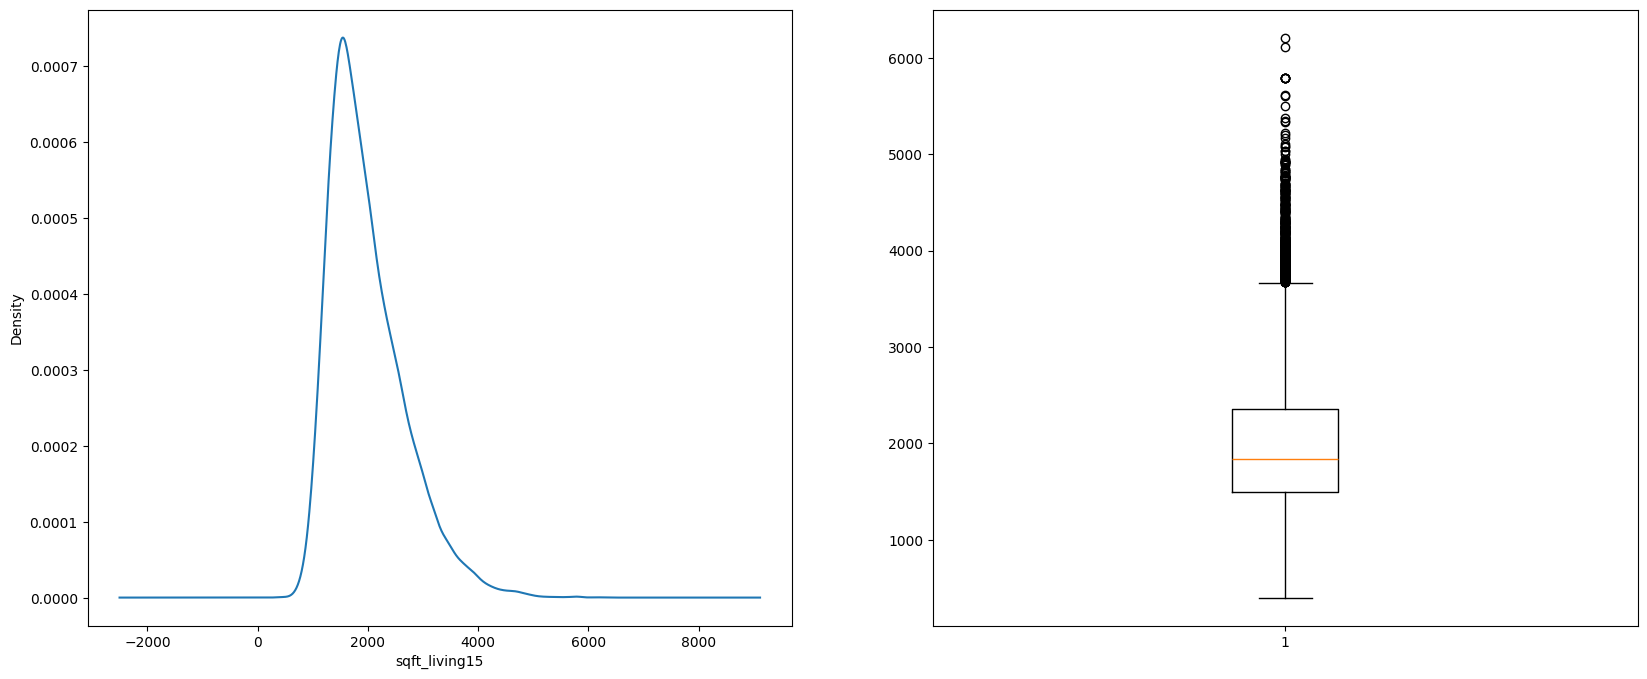

In [63]:
#univariate analysis variabel 'sqft_living'
f = plt.figure(figsize=(20,8))

# add_subplot(baris, kolom, posisi)
f.add_subplot(1,2,1)
dataFrame['sqft_living15'].plot(kind='kde')
plt.xlabel('sqft_living15')

f.add_subplot(1,2,2)
#membuat boxplot untuk variabel 'sqft_living15'
plt.boxplot(dataFrame['sqft_living15'])
plt.show()

**Informasi:**

- Density(kepadatan) dari luas rumah(sqft_living15) ada di angka 1500an
- Dilihat dari boxplot, ada banyak outliers di atas garis maksimum

kepadatan antara 'sqft_living', 'sqft_above', dan 'sqft_living15' memiliki kemiripan.

Text(0.5, 1.0, 'Distribution of Grade')

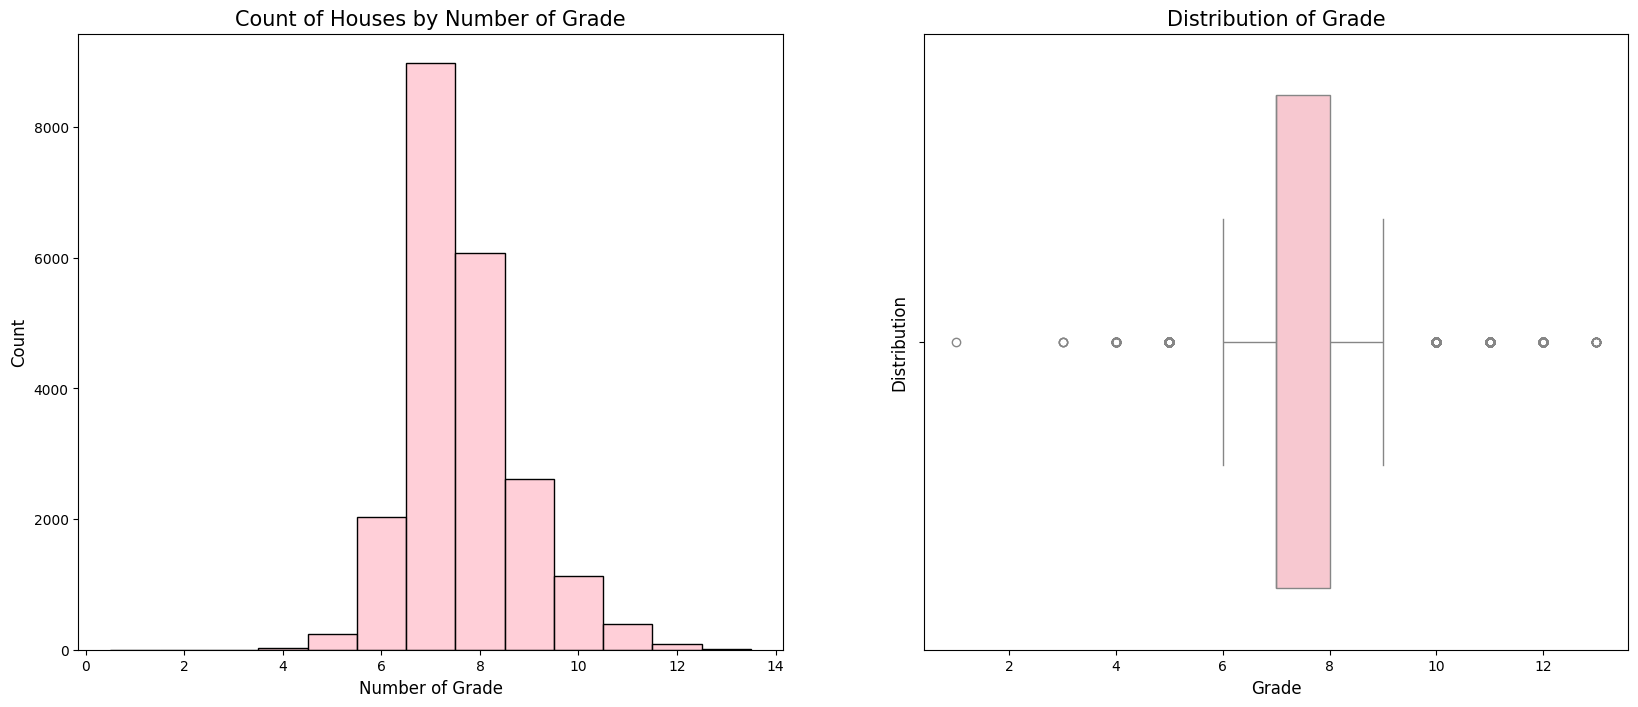

In [64]:
#univariate analysis variabel 'grade'
plt.figure(figsize=(20, 8))

# Left subplot: Count plot for 'grade'
plt.subplot(1, 2, 1)
sns.histplot(data=dataFrame, x='grade', discrete=True, kde=False, color='pink')
plt.xlabel('Number of Grade', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Houses by Number of Grade', fontsize=15)

# Right subplot: Box plot for 'grade'
plt.subplot(1, 2, 2)
sns.boxplot(data=dataFrame, x='grade', color='pink')
plt.xlabel('Grade', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.title('Distribution of Grade', fontsize=15)

In [65]:
dataFrame['grade'].value_counts().sort_index(ascending = True)

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: count, dtype: int64

**Informasi:**

- Kebanyakan rumah memiliki grade 7 dan 8
- Boxplot menunjukkan ada outlier di bawah garis minimum dan diatas garis maksimum

Text(0.5, 1.0, 'Distribution of Floors')

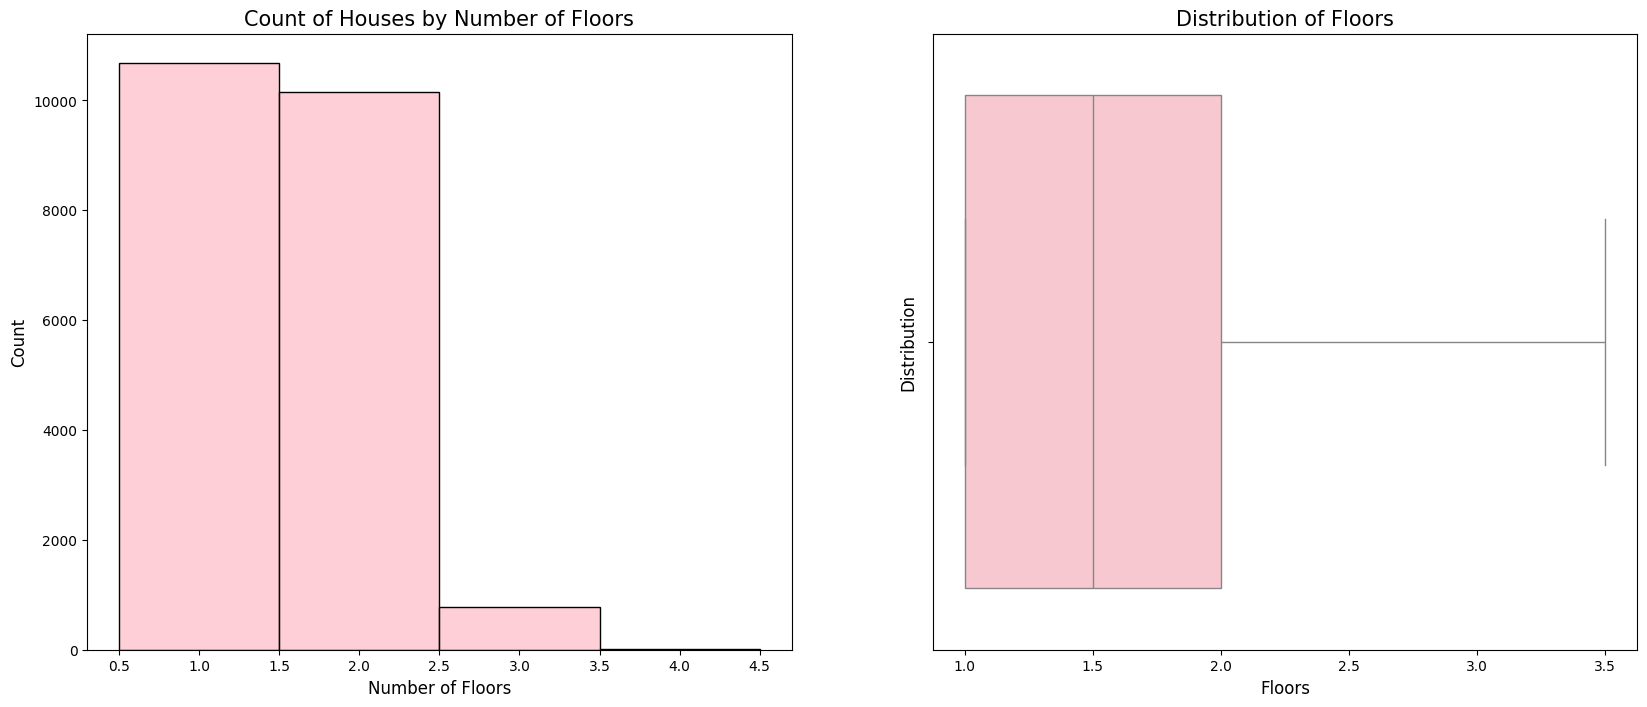

In [68]:
# univariate analysis variabel 'floors'
plt.figure(figsize=(20, 8))

# Left subplot: Count plot for 'floors'
plt.subplot(1, 2, 1)
sns.histplot(data=dataFrame, x='floors', discrete=True, kde=False, color='pink')
plt.xlabel('Number of Floors', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Houses by Number of Floors', fontsize=15)

# Right subplot: Box plot for 'floors'
plt.subplot(1, 2, 2)
sns.boxplot(data=dataFrame, x='floors', color='pink')
plt.xlabel('Floors', fontsize=12)
plt.ylabel('Distribution', fontsize=12)
plt.title('Distribution of Floors', fontsize=15)

In [69]:
dataFrame['floors'].value_counts().sort_index(ascending = True)

floors
1.0    10680
1.5     1910
2.0     8241
2.5      161
3.0      613
3.5        8
Name: count, dtype: int64

**Informasi:** Kebanyakan rumah memiliki 1 lantai

**Bivariate analysis**
  
Bivariate analysis berfungsi untuk melihat hubungan antara variabel satu dengan variabel lain, dalam kasus ini adalah variabel indepen terhadap variabel dependen(price)

<Figure size 1000x800 with 0 Axes>

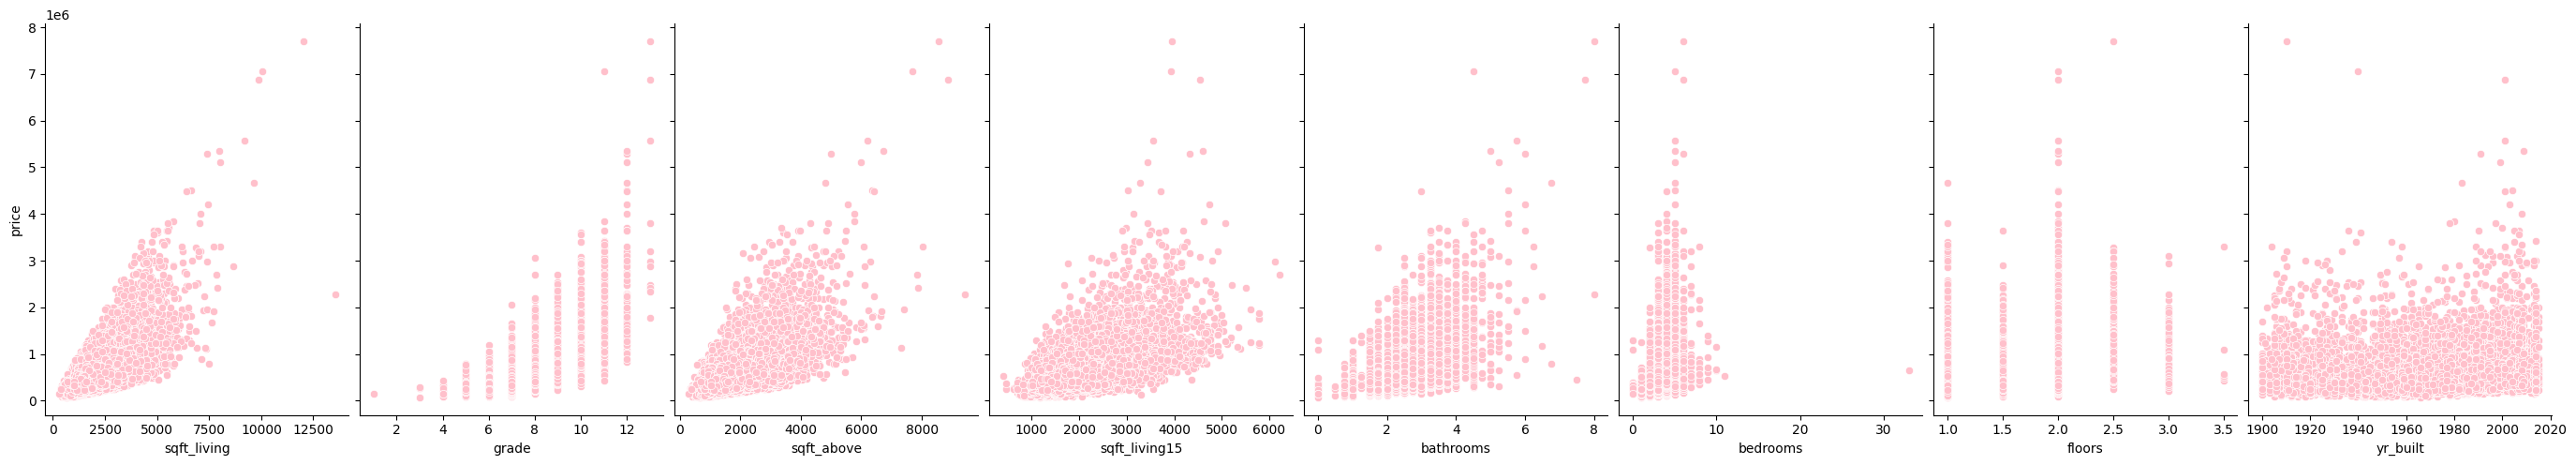

In [72]:
plt.figure(figsize=(10, 8))

# Membuat pairplot dengan warna pink
sns.pairplot(data=dataFrame,
             x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'bedrooms', 'floors', 'yr_built'],
             y_vars=['price'],
             height=5,
             aspect=0.7,
             plot_kws={'color': 'pink'},
             diag_kws={'color': 'pink'})

plt.show()

**Informasi:**

- 'sqft_living' hingga 6000 memiliki kepadatan yang tinggi, harga rumah memiliki variasi yang lebih pada ukuran 'sqft_living' tersebut
- semakin tinggi 'grade' maka semakin bervariasi harga dari rumah, namun semakin tinggi 'grade' data tersebut semakin jarang
- 'sqft_above' memiliki persebaran yang mirip dengan 'sqft_living'
- 'sqft_living15' memiliki persebaran yang lebih luas dibanding 'sqft_living' dan 'sqft_above'
- Semakin banyak jumlah 'bathrooms' maka semakin bervariasi harga dari rumah
- rumah dengan jumlah 'bedrooms' 5 dan 6 justru memiliki harga yang lebih tinggi dibanding rumah dengan 'bedrooms' yang lebih banyal
- 'floors' dengan angka 2 memiliki harga yang lebih bervariasi dan lebih tinggi dibanding 1 dan 3

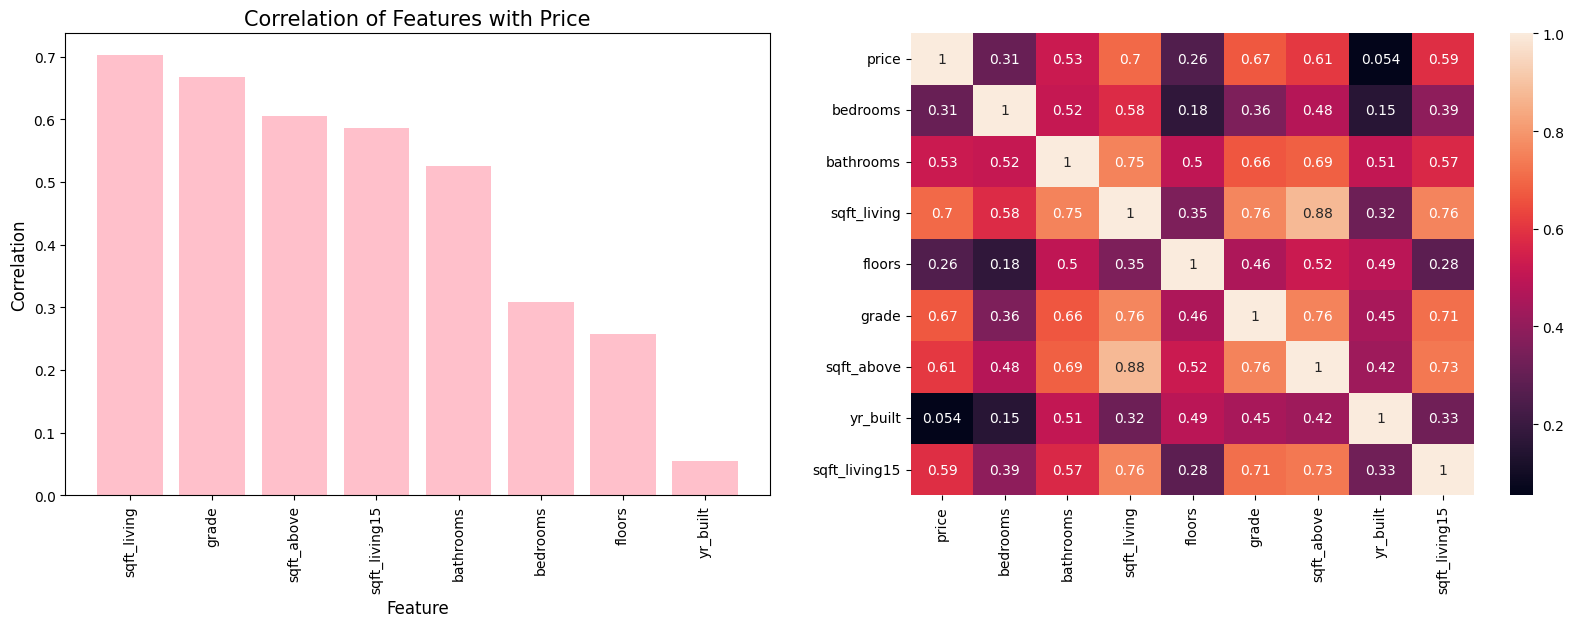

In [73]:
# Melihat variabel yang paling berpengaruh terhadap harga
cor = dataFrame.corr()['price'].sort_values(ascending=False).drop(['price'])
f=plt.figure(figsize=(20,6))

f.add_subplot(1,2,1)
plt.bar(x=list(cor.index), height=list(cor.values), color='pink')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)

f.add_subplot(1,2,2)
sns.heatmap(dataFrame.corr(), annot=True)

plt.show()

Dari seluruh variabel yang telah dipilih, variabel 'sqft_living' memiliki pengaruh paling tinggi terhadap harga, sedangkan variabel 'floors' memiliki pengaruh paling rendah terhadap harga

**Modelling**

Dalam proses ini kita akan melakukan pembagian data menjadi data train dan data test, kemudian membandingkan akurasi dari beberapa algoritma regression.

In [74]:
#melihat 20 data pertama
dataFrame.head(20)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
0,221900.0,3,1.00,1180,1.0,7,1180,1955,1340
1,538000.0,3,2.25,2570,2.0,7,2170,1951,1690
2,180000.0,2,1.00,770,1.0,6,770,1933,2720
3,604000.0,4,3.00,1960,1.0,7,1050,1965,1360
4,510000.0,3,2.00,1680,1.0,8,1680,1987,1800
5,1225000.0,4,4.50,5420,1.0,11,3890,2001,4760
6,257500.0,3,2.25,1715,2.0,7,1715,1995,2238
7,291850.0,3,1.50,1060,1.0,7,1060,1963,1650
8,229500.0,3,1.00,1780,1.0,7,1050,1960,1780
9,323000.0,3,2.50,1890,2.0,7,1890,2003,2390


In [75]:
#melihat 20 data terakhir
dataFrame.tail(20)

,price,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,yr_built,sqft_living15
21593,1088000.0,5,3.75,4170,2.0,10,4170,2006,3030
21594,350000.0,4,2.75,2500,2.0,8,2500,2008,2530
21595,520000.0,2,2.25,1530,3.0,8,1480,2006,1530
21596,679950.0,5,2.75,3600,2.0,9,3600,2014,3550
21597,1575000.0,4,3.25,3410,2.0,10,3410,2007,2290
21598,541800.0,4,2.50,3118,2.0,9,3118,2014,2673
21599,810000.0,4,3.00,3990,2.0,9,3990,2003,3370
21600,1537000.0,5,3.75,4470,2.0,11,4470,2008,2780
21601,467000.0,3,2.50,1425,3.0,8,1425,2008,1285
21602,224000.0,3,1.75,1500,1.0,6,1500,2014,1320


Membuat variabel 'X' sebagai variabel independen, variabel diambil dari data yang sudah ada, variabel 'price' dihilangkan karena merupakan variabel dependen


Variabel 'y' berisi variabel 'price' sebagai variabel dependen

In [76]:
# X(Independent variables) and y(target variables) 
X = dataFrame[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'grade', 'sqft_above', 'sqft_living15', 'yr_built']]
y = dataFrame['price']

In [77]:
X

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15,yr_built
0,3,1.00,1180,1.0,7,1180,1340,1955
1,3,2.25,2570,2.0,7,2170,1690,1951
2,2,1.00,770,1.0,6,770,2720,1933
3,4,3.00,1960,1.0,7,1050,1360,1965
4,3,2.00,1680,1.0,8,1680,1800,1987
...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,8,1530,1530,2009
21609,4,2.50,2310,2.0,8,2310,1830,2014
21610,2,0.75,1020,2.0,7,1020,1020,2009
21611,3,2.50,1600,2.0,8,1600,1410,2004


In [78]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

import train_test_split dari sklearn yang berfungsi membagi data yang kita gunakan menjadi data train dan data test

In [79]:
from sklearn.model_selection import train_test_split

Split data training dan data testing dengan pembagian 70%(training) dan 30%(testing), pembagian data bisa bervariasi sesuai keinginan, umumnya dibagi menjadi 80 20 atau 70 30

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [81]:
#cek shape data train dan test
print("x_train: ", X_train.shape)
print("x_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (15129, 8)
x_test:  (6484, 8)
y_train:  (15129,)
y_test:  (6484,)


In [82]:
X_train

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15,yr_built
2934,4,2.50,2100,2.0,8,2100,2090,2002
2564,4,3.00,3900,1.0,10,2520,3410,1972
19760,4,3.00,1984,2.0,7,1984,2095,2012
12005,4,1.75,4060,2.0,9,2660,3320,1924
4954,3,2.25,1800,1.0,8,1800,2480,1976
...,...,...,...,...,...,...,...,...
14565,5,3.25,3800,1.0,7,2490,2000,1965
15649,4,1.75,1940,1.0,8,1940,2405,1974
10123,3,2.50,1890,2.0,8,1890,2460,2000
5600,4,3.50,4020,2.0,11,4020,3930,2001


In [83]:
X_test

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15,yr_built
5533,3,1.75,1660,1.0,7,960,1510,1941
625,3,1.00,960,1.0,6,820,1200,1944
20463,3,2.50,2730,2.0,8,2730,2130,2012
9965,3,2.25,2900,2.0,9,2900,2510,1986
3929,3,2.25,1590,1.0,7,1100,2060,1976
...,...,...,...,...,...,...,...,...
13420,3,1.50,1320,1.0,7,1320,1370,1959
15980,3,2.50,3230,1.0,8,2100,2760,1964
12086,4,1.75,1700,1.0,7,1700,1930,1967
19119,4,2.50,2810,2.0,9,2810,2990,1993


In [84]:
X_test.head(20)

,bedrooms,bathrooms,sqft_living,floors,grade,sqft_above,sqft_living15,yr_built
5533,3,1.75,1660,1.0,7,960,1510,1941
625,3,1.00,960,1.0,6,820,1200,1944
20463,3,2.50,2730,2.0,8,2730,2130,2012
9965,3,2.25,2900,2.0,9,2900,2510,1986
3929,3,2.25,1590,1.0,7,1100,2060,1976
19522,4,3.00,1840,2.0,8,1840,1650,1988
8360,3,1.00,1130,1.0,7,1130,1410,1965
19670,5,3.50,4890,2.0,9,3590,4590,2014
864,4,2.50,2050,2.0,8,2050,2050,1990
11520,4,1.75,2160,2.0,8,2160,1990,1981


In [85]:
y_test.head(20)

5533     530000.0
625      289500.0
20463    510000.0
9965     485000.0
3929     405000.0
19522    268000.0
8360     354000.0
19670    865950.0
864      280000.0
11520    475000.0
10219    950000.0
15281    339999.0
3835     889000.0
4300     340000.0
782      320000.0
14390    415000.0
21296    445000.0
13331    435010.0
3245     658600.0
3799     851500.0
Name: price, dtype: float64

In [86]:
y_train

2934      380000.0
2564     1620000.0
19760     292000.0
12005    1300000.0
4954      474900.0
           ...    
14565     380000.0
15649     252000.0
10123     465000.0
5600     1691000.0
14000     470000.0
Name: price, Length: 15129, dtype: float64

In [87]:
y_test

5533     530000.0
625      289500.0
20463    510000.0
9965     485000.0
3929     405000.0
           ...   
13420    275000.0
15980    499950.0
12086    423000.0
19119    747500.0
11054    339950.0
Name: price, Length: 6484, dtype: float64

**Percobaan dengan beberapa algoritma regression**

**1. Linear Regression**

In [89]:
#menggunakan model linear regression
#from sklearn.linear_model import LinearRegression

#linReg = LinearRegression()
#linReg.fit(X_train, y_train)

In [90]:
#print('akurasi dengan data train:', linReg.score(X_train, y_train)*100)

**2. Gradient Boosting Regression**

In [91]:
#menggunakan model gradient boosting regressor
#from sklearn.ensemble import GradientBoostingRegressor

#GBR = GradientBoostingRegressor(random_state=50, n_estimators=300)
#GBR.fit(X_train, y_train)

In [92]:
#print('akurasi dengan data train:', GBR.score(X_train, y_train)*100)

**3. Random Forest Regression**

In [94]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

RFG = RandomForestRegressor(n_estimators=300,random_state=50)

#training dan cek akurasi dengan data train
RFG.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=50)

In [95]:
print('akurasi dengan data train:', RFG.score(X_train, y_train)*100)

akurasi dengan data train: 95.76575674247096


Dari hasil percobaan ketiga algoritma, algoritma dengan akurasi paling tinggi adalah Random Forest Regression


RFG = RandomForestRegressor(n_estimators=200, max_depth=200)

**Akurasi =** 94.63265849272376
*****************************************************

RFG = RandomForestRegressor(n_estimators=300)

**Akurasi =** 94.64595082082823
*****************************************************

RFG = RandomForestRegressor(n_estimators=300, max_depth=1000)

**Akurasi =** 94.66362656403754
*****************************************************

RFG = RandomForestRegressor(n_estimators=300, random_state=50)

**Akurasi =** 94.68145042511402
*****************************************************

RFG = RandomForestRegressor(n_estimators=300,random_state=50)

**Akurasi =** 94.7607558487369

yang baru: (ditambah variabel 'floors')

**kesimpulan:** dengan beberapa percobaan parameter, hasil tertinggi adalah:

RFG = RandomForestRegressor(n_estimators=300,random_state=50)

**Akurasi tertinggi(dengan data train): 94.7607558487369**

In [96]:
#cek MAPE dan r2 untuk random forest regressor
from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import mean_squared_percentage_error
from sklearn.metrics import r2_score

print("mean absolute percentage error:", mean_absolute_percentage_error(y_test, RFG.predict(X_test))*100)

print("r2 score:", r2_score(y_test, RFG.predict(X_test))*100)

mean absolute percentage error: 25.660185544908238
r2 score: 69.73102557432014


**Mean Absolute Percentage Error (MAPE):**

- MAPE (Mean Absolute Percent Error) digunakan jika ukuran variabel peramalan merupakan faktor penting dalam mengevaluasi akurasi peramalan tersebut. MAPE memberikan petunjuk seberapa besar kesalahan peramalan dibandingkan dengan nilai sebenarnya

- Berdasarkan Lewis (1982), nilai MAPE dapat diinterpretasikan atau ditafsirkan ke dalam 4 kategori yaitu: <10% = sangat akurat. 10-20% = baik. 20-50% = wajar.

**R2 (R squared score):**

- R squared merupakan angka yang berkisar antara 0 sampai 1 (0 sampai 100 jika dalam persen) yang mengindikasikan besarnya kombinasi variabel independen secara bersama – sama mempengaruhi nilai variabel dependen. Semakin mendekati angka satu, model yang dikeluarkan oleh regresi tersebut akan semakin baik.

- Menurut Chin (1998), nilai R-Square dikategorikan kuat jika lebih dari 0,67, moderat jika lebih dari 0,33 tetapi lebih rendah dari 0,67, dan lemah jika lebih dari 0,19 tetapi lebih rendah dari 0,33.

In [97]:
# Sample dari harga asli dan harga prediksi
y_pred = RFG.predict(X_test)
y_df = pd.DataFrame(y_test)
y_df['PredictedPrice']=y_pred
y_df.head(10)

,price,PredictedPrice
5533,530000.0,5.106182e+05
625,289500.0,2.738927e+05
20463,510000.0,4.827999e+05
9965,485000.0,6.292163e+05
3929,405000.0,3.806712e+05
19522,268000.0,4.520167e+05
8360,354000.0,3.160546e+05
19670,865950.0,1.216487e+06
864,280000.0,5.172280e+05
11520,475000.0,5.597510e+05


In [98]:
y_df

,price,PredictedPrice
5533,530000.0,510618.150000
625,289500.0,273892.660000
20463,510000.0,482799.943333
9965,485000.0,629216.266667
3929,405000.0,380671.213333
...,...,...
13420,275000.0,339166.516667
15980,499950.0,688232.953333
12086,423000.0,446589.737778
19119,747500.0,617038.851111


In [99]:
#melihat rata-rata persentase selisih antara price dan PredictedPrice
y_df['Difference'] = (y_df['PredictedPrice']-y_df['price'])
y_df['Difference'] = y_df['Difference']/y_df['price']*100 
selisih = y_df['Difference'].mean()
print('rata-rata persentase selisih antara harga asli dan harga prediksi: ', selisih, '%')

rata-rata persentase selisih antara harga asli dan harga prediksi:  9.025133935312514 %


Mencoba beberapa inputan dan melihat prediksi

In [100]:
# 'bedrooms', 'bathrooms', 'sqft_living', 'floors',	'grade', 'sqft_above, 'sqft_living15, 'yr_built'

print("1.")
print("harga aktual: 530000")
harga_pred = RFG.predict([[3,	1,	1660,	1,	7,	960,	1510,	1941]])
print("harga prediksi:", harga_pred)
print("persentase perbedaan:", ((harga_pred-530000)/530000)*100, "%")

1.
harga aktual: 530000
harga prediksi: [509173.06666667]
persentase perbedaan: [-3.92961006] %


C:\Users\62895\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


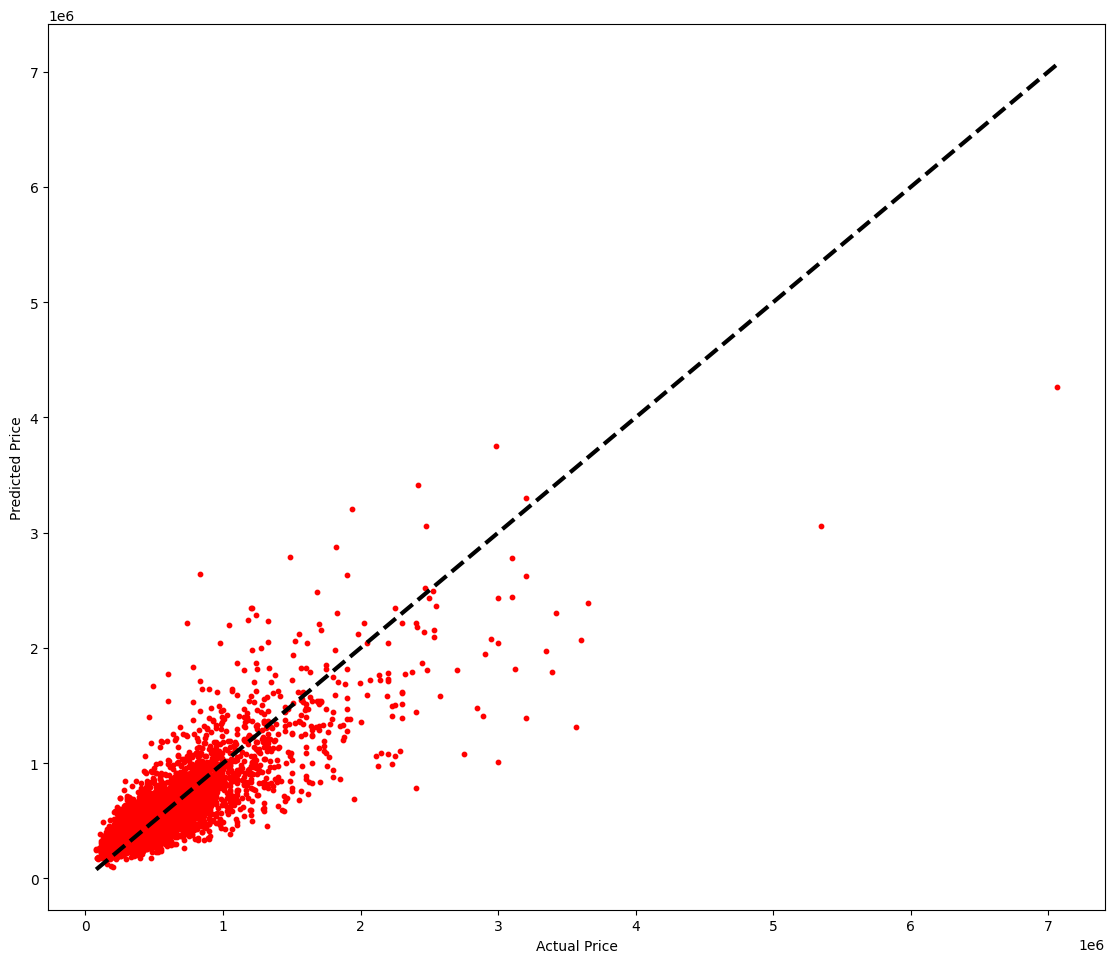

In [101]:
#melihat plot antara harga prediksi dengan harga real
f = plt.figure(figsize=(30,11.5))

f.add_subplot(1,2,1)
plt.scatter(y_test, RFG.predict(X_test), color='red', s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', lw=3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

Jika plot semakin rapat dengan garis putus-putus, maka menunjukkan bahwa harga prediksi dan harga aktual memiliki selisih yang kecil

In [76]:
#melihat variance score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


print("variance score:", explained_variance_score(y_test, RFG.predict(X_test)))
print("mean squared error:", mean_squared_error(y_test, RFG.predict(X_test)))
print("r2 score:", r2_score(y_test, RFG.predict(X_test)))

variance score: 0.7027867070292917
mean squared error: 40514109938.98212
r2 score: 0.702785467115288


# **Kesimpulan :**
Random Forest Regressor terbukti efektif untuk prediksi harga rumah, dengan akurasi tertinggi **94.7608%** pada model akhir. Model ini berhasil mengidentifikasi fitur penting seperti jumlah kamar dan luas area hidup, yang berguna untuk analisis pasar properti.

Random Forest Regressor membantu mengidentifikasi fitur-fitur utama yang mempengaruhi harga rumah, seperti jumlah kamar, jumlah kamar mandi, luas area hidup, jumlah lantai, kualitas atau tingkat bangunan,  luas area di atas tanah, dan tahun dibangun yang dapat memberikan wawasan berharga untuk analisis lebih lanjut.

Model ini memiliki **Mean Absolute Percentage Error (MAPE)** sebesar **25.6602%**, yang termasuk dalam kategori "Wajar". Ini menunjukkan bahwa meskipun model memberikan prediksi yang berguna, terdapat ruang untuk perbaikan dalam hal akurasi, dengan kesalahan prediksi rata-rata sekitar **25.66%** dari nilai sebenarnya. Di sisi lain, **R² (R squared score)** mencapai **69.7310%**, yang termasuk dalam kategori "Kuat". Nilai ini menunjukkan bahwa model mampu menjelaskan **69.73%** dari variabilitas harga rumah, menandakan bahwa model cukup baik dalam mencerminkan hubungan antara variabel independen dan harga rumah.

Random Forest Regressor memiliki kelebihan dalam hal mengatasi data yang besar dan variabel, namun penting untuk terus memantau dan memperbarui model agar tetap relevan dengan kondisi pasar yang berubah.